Data Science Notebook - Philosophy Data Project, Peter Langer (pjl2144)

In [267]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Importing Functions from /lib

In [276]:
import helper_functions

Importing Data

In [3]:
#Change this path to relative
#os.chdir('..') #cd to the download folder

df = pd.read_csv('/Users/peter/Downloads/philosophy_data.csv')

In [180]:
#Creating Corpus from Helper Functions (create_corpus is in helper_functions.py)
df_processed, corpusc = create_corpus(df)


[nltk_data] Downloading package stopwords to /Users/peter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Figure 1.1: A Table of Works Included in the Philosophy Data Project, by number of sentences (Count) and total discrete publications


,title,author,count,count_total_works
0,"A General Theory Of Employment, Interest, And ...",Keynes,3411,1
1,A Treatise Concerning The Principles Of Human ...,Berkeley,1040,2
2,A Treatise Of Human Nature,Hume,7047,2
3,Anti-Oedipus,Deleuze,6679,2
4,Aristotle - Complete Works,Aristotle,48779,1
5,Being And Time,Heidegger,8505,2
6,Beyond Good And Evil,Nietzsche,1906,5
7,Capital,Marx,12996,2
8,Critique Of Judgement,Kant,4204,3
9,Critique Of Practical Reason,Kant,2452,3


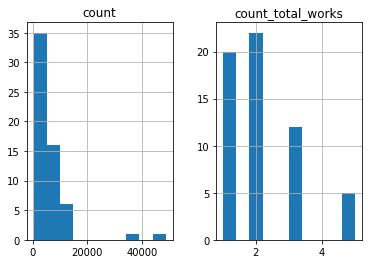

In [187]:
print("Figure 1.1: A Table of Works Included in the Philosophy Data Project, by number of sentences (Count) and total discrete publications")
aggregation_1_1 = aggregate_metrics(df)
aggregation_1_1.hist()
aggregation_1_1.head(20)

Sentiment Scoring Results - by Philosopher

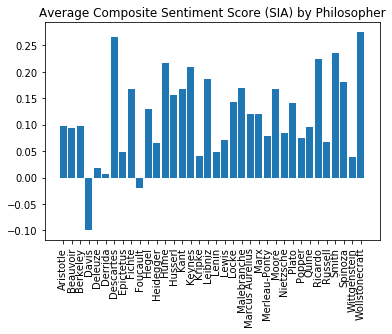

In [195]:
agg_tab_title, agg_tab_auth = generate_graphs(df_processed)


In [216]:
agg_tab_auth
print("Figure 1.2 - Chart of Mean Composite Sentiment by Bucket")
print(agg_tab_auth.pivot_table(index = 'sentiment_rate', values = 'composite_sentiment', aggfunc = np.mean))
print("                    ")
print("Figure 1.3 - Composition of Authors in Sample")
print(agg_tab_auth['sentiment_rate'].value_counts()/36)

Figure 1.2 - Chart of Mean Composite Sentiment by Bucket
                composite_sentiment
sentiment_rate                     
negative                  -0.099027
neutral                    0.025876
positive                   0.146362
                    
Figure 1.3 - Composition of Authors in Sample
positive    0.777778
neutral     0.194444
negative    0.027778
Name: sentiment_rate, dtype: float64


Sentiment Scores as Stochastic Processes

In [259]:
acf_dictionary = time_series_analysis(df_processed)

ACF/PACF - Saved to /Users/peter/Downloads/figs/


In [319]:
print("An Output of Partial Autocorrelations according to Text Sentiment & K-Means Classes")
dict_acf

An Output of Partial Autocorrelations according to Text Sentiment & K-Means Classes


,title,0,1,2,3,4,5,6,7,8,9,10,kmeans_class
0,Plato - Complete Works,1.0,0.142112,0.117377,0.105382,0.082854,0.082456,0.077339,0.067713,0.071405,0.063052,0.062207,6
1,Aristotle - Complete Works,1.0,0.192751,0.154200,0.136944,0.128426,0.125356,0.123050,0.119045,0.106018,0.108586,0.106766,1
2,Second Treatise On Government,1.0,0.196266,0.188975,0.177723,0.107958,0.100209,0.071379,0.088267,0.107170,0.092347,0.059354,1
3,Essay Concerning Human Understanding,1.0,0.114838,0.072606,0.071713,0.065218,0.063411,0.054372,0.043020,0.035671,0.019307,0.015238,0
4,A Treatise Of Human Nature,1.0,0.178536,0.142487,0.134990,0.116381,0.103133,0.116533,0.115712,0.117739,0.104052,0.121302,1
5,Dialogues Concerning Natural Religion,1.0,0.074257,-0.000323,0.112213,0.076398,0.076165,0.048435,0.049776,0.033544,0.013681,0.068592,0
6,Three Dialogues,1.0,0.053713,0.072399,0.048709,0.035802,0.033583,0.039799,0.012852,0.026715,-0.020961,0.023624,4
7,A Treatise Concerning The Principles Of Human ...,1.0,0.038253,0.082518,0.029443,0.017291,0.013312,0.098437,0.071759,0.053782,0.061776,0.089410,0
8,Ethics,1.0,0.166488,0.150426,0.118393,0.112534,0.081298,0.092886,0.059966,0.073591,0.066292,0.029519,6
9,On The Improvement Of Understanding,1.0,0.158213,0.112511,0.150550,0.059782,0.089590,0.097179,-0.038645,-0.013660,-0.033966,0.010930,3


In [288]:
from sklearn.cluster import KMeans
    
dict_acf = pd.DataFrame(acf_dictionary).transpose().reset_index()
km_ready = dict_acf.iloc[:,2:12]
kmeans = KMeans(7) # We choose 7 for a reason
kmeans.fit(km_ready)
    
dict_acf['kmeans_class'] = kmeans.fit_predict(km_ready)

print('Figure 1.4: K means of autoregressive lag correlations of numerical sentiment scores by Work, not author')
print(dict_acf.groupby(['index','kmeans_class']).size())

dict_acf = dict_acf.rename(columns={"index":"title"})

#dict_acf = pd.merge(dict_acf,df_processed[['title','school']], how='left',on='title')
#Here is some commented out code if you'd like to see what the autocorrelations look like through lags 0-10.

#for j in range(2,12):
#    plt.scatter(y = acf_dictionary_1.iloc[:,j], x = acf_dictionary_1['index'], label = 'Parameter Lag ' + str(j))
#    plt.xticks(rotation=90)
#    plt.show()
#acf_dictionary_1 = pd.melt(acf_dictionary_1, id_vars='index', value_vars=acf_dictionary_1.columns[:-1])
#acf_dictionary_1.head()
#plt.plot(acf_dictionary_1 )
#plt.xticks(rotation=90)
#plt.show()

Figure 1.4: K means of autoregressive lag correlations of numerical sentiment scores by Work, not author
index                                                    kmeans_class
A General Theory Of Employment, Interest, And Money      6               1
A Treatise Concerning The Principles Of Human Knowledge  0               1
A Treatise Of Human Nature                               1               1
Anti-Oedipus                                             0               1
Aristotle - Complete Works                               1               1
Being And Time                                           1               1
Beyond Good And Evil                                     4               1
Capital                                                  6               1
Critique Of Judgement                                    6               1
Critique Of Practical Reason                             2               1
Critique Of Pure Reason                                  0               1


Topic Modeling

In [277]:
counts = dictionary_parser(corpusc)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
0: 0.012*"one" + 0.009*"thing" + 0.007*"would" + 0.007*"man" + 0.007*"say" + 0.005*"must" + 0.005*"good" + 0.005*"like" + 0.005*"women" + 0.005*"make"

1: 0.008*"one" + 0.008*"would" + 0.007*"upon" + 0.006*"price" + 0.006*"labour" + 0.006*"countri" + 0.006*"great" + 0.005*"valu" + 0.005*"part" + 0.005*"employ"

2: 0.012*"idea" + 0.010*"one" + 0.006*"labour" + 0.006*"may" + 0.005*"natur" + 0.005*"mind" + 0.005*"thing" + 0.005*"us" + 0.004*"object" + 0.004*"exist"

3: 0.011*"one" + 0.008*"say" + 0.007*"may" + 0.007*"mean" + 0.006*"would" + 0.005*"true" + 0.005*"statement" + 0.005*"word" + 0.005*"thing" + 0.005*"use"

4: 0.012*"one" + 0.011*"thing" + 0.008*"god" + 0.007*"would" + 0.006*"natur" + 0.006*"bodi" + 0.006*"us" + 0.006*"must" + 0.006*"say" + 0.005*"reason"

5: 0.016*"one" + 0.010*"thing" + 0.007*"must" + 0.006*"also" + 0.006*"part" + 0.005*"man" + 0.005*"natur" + 0.005*"anim" + 0.005*"case" + 0.005*"say"

6: 0.011*"

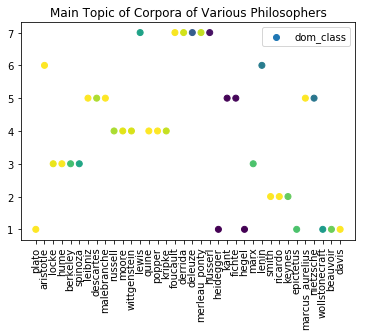

In [278]:
#Internal Code to Generate Charts and Graphs
list_phil=list(corpusc.keys())
dict_philosophers = pd.DataFrame(list_phil).rename(columns={0:'philosopher'})
dict_philosophers['One'] = 0.0
dict_philosophers['Two'] = 0.0
dict_philosophers['Three'] = 0.0
dict_philosophers['Four'] = 0.0
dict_philosophers['Five'] = 0.0
dict_philosophers['Six'] = 0.0
dict_philosophers['Seven'] = 0.0

for c in range(0,len(counts)):
    for p in counts[c]:
        if p[0] == 0:
            dict_philosophers.iloc[c,1] = p[1]
        elif p[0] == 1:
            dict_philosophers.iloc[c,2] = p[1]
        elif p[0] == 2:
            dict_philosophers.iloc[c,3] = p[1]
        elif p[0] == 3:
            dict_philosophers.iloc[c,4] = p[1]
        elif p[0] == 4:
            dict_philosophers.iloc[c,5] = p[1]
        elif p[0] == 5:
            dict_philosophers.iloc[c,6] = p[1]
        elif p[0] == 6:
            dict_philosophers.iloc[c,7] = p[1]
        

dict_philosophers['dom_class'] = dict_philosophers[['One','Two','Three','Four','Five','Six','Seven']].values.argmax(1)+1
dict_philosophers['dom_intensity'] = dict_philosophers[['One','Two','Three','Four','Five','Six','Seven']].values.max(1)
agg_table_author_school = df_processed.pivot_table(index = ['author_strp','school'],values = 'composite_sentiment', aggfunc = np.mean).reset_index()
agg_table_author_school = agg_table_author_school.rename(columns={'author_strp':'philosopher'})
#plt.imshow(dict_philosophers.iloc[:,1:8])
#plt.colorbar()

plt.scatter(x= dict_philosophers['philosopher'], y = dict_philosophers['dom_class'], c = dict_philosophers['dom_intensity'])
dict_philosophers = pd.merge(dict_philosophers,agg_table_author_school, how = 'left',on = 'philosopher')
plt.xticks(rotation=90)
plt.legend()
plt.title('Main Topic of Corpora of Various Philosophers')
plt.show()
#dict_philosophers
agged_implicit_classifications = dict_philosophers.pivot_table(index = ['dom_class','school'],values = 'dom_intensity').reset_index()

In [280]:
agged_implicit_classifications

,dom_class,school,dom_intensity
0,1,feminism,0.772768
1,1,german_idealism,0.000000
2,1,phenomenology,0.000000
3,1,plato,0.997433
4,1,stoicism,0.718238
5,2,capitalism,0.920688
6,3,communism,0.715332
7,3,empiricism,0.887355
8,3,rationalism,0.592828
9,4,analytic,0.946229


Tying it all together - "Was Aristotle really a communist?"

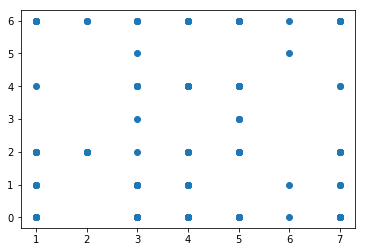

kmeans_class,0,1,2,3,4,5,6
dom_class,,,,,,,
1,6.0,4.0,6.0,NaN,1.0,NaN,7.0
2,NaN,NaN,6.0,NaN,NaN,NaN,3.0
3,10.0,6.0,1.0,1.0,4.0,1.0,4.0
4,36.0,6.0,6.0,NaN,12.0,NaN,6.0
5,7.0,NaN,9.0,3.0,7.0,NaN,13.0
6,1.0,1.0,NaN,NaN,NaN,1.0,1.0
7,15.0,3.0,13.0,NaN,2.0,NaN,6.0


In [310]:
df_processed_pro = df_processed.groupby(['author_strp','title','school']).size().reset_index()
df_processed_pro = pd.merge(dict_acf,df_processed_pro, how = 'left', on = 'title')
df_processed_pro = pd.merge(df_processed_pro,dict_philosophers, on = 'school')
plt.scatter(df_processed_pro['dom_class'],df_processed_pro['kmeans_class'], label = 'comparing classification outputs by frequency')
plt.show()
df_processed_pro_fin = df_processed_pro.pivot_table(index = ['dom_class'], columns = 'kmeans_class',values = 'school',aggfunc = 'count')
df_processed_pro_fin

In [317]:
df_processed_pro.pivot_table(index = ['author_strp','school','kmeans_class'],values = 'philosopher', aggfunc = 'count').reset_index()

,author_strp,school,kmeans_class,philosopher
0,aristotle,aristotle,1,1
1,beauvoir,feminism,6,3
2,berkeley,empiricism,0,3
3,berkeley,empiricism,4,3
4,davis,feminism,1,3
5,deleuze,continental,0,3
6,deleuze,continental,2,3
7,derrida,continental,2,3
8,descartes,rationalism,4,4
9,descartes,rationalism,6,4


In [318]:
df_processed_pro.pivot_table(index = ['school','dom_class'],values = 'composite_sentiment', aggfunc = 'mean').reset_index()

,school,dom_class,composite_sentiment
0,analytic,4,0.080721
1,analytic,7,0.071562
2,aristotle,6,0.097532
3,capitalism,2,0.222881
4,communism,3,0.120825
5,communism,6,0.048409
6,continental,7,0.001466
7,empiricism,3,0.151546
8,feminism,1,0.089688
9,german_idealism,1,0.130074


The truth is, we won't know if Aristotle was a communist (in today's parlance), however, we've extracted some interesting insights from the data here.

In doing so, we looked both at text content from a fundamental perspective (eg. Topic Modeling) and from a meta perspective (eg. looking to see if there were coherent patterns in the writing style of the authors by attempting to model sentiment autoregressively and then clustering the results).

Summary Findings:

-Stoicism and Rationalism appear to share a common topical lineage, as reflected in our LDA output as well as in an analysis of sentiment dynamics within documents.

-Capitalist Texts appear to use the most 'optimistic', or positively sentimented (per VADER) language. This holds true across Smith, Ricardo and Keynes' texts on average.  

-Communist Philosophical Texts, like their Capitalist counterparts shared some lineage (eg. focused on some of the same topics) as Rationalism.

-Stoicists used more muted text than other philosophers mostly, riding the line between Neutral and Positive.

-No single philosophical school had an objectively negative composite sentiment, on average.

-Feminist philosophy was able to be clustered completely in Cluster 1 from the LDA output, which implies some homogeneity as far as topics handled is concerned. Feminist philosophers, despite having a Angela Davis as a class member (who wrote the most negatively, per VADER scores), actually were fairly positive in their sentiment for the most part.


Index([              'title',                 '0_x',                     1,
                           2,                     3,                     4,
                           5,                     6,                     7,
                           8,                     9,                    10,
              'kmeans_class',         'author_strp',              'school',
                       '0_y',         'philosopher',                 'One',
                       'Two',               'Three',                'Four',
                      'Five',                 'Six',               'Seven',
                 'dom_class',       'dom_intensity', 'composite_sentiment'],
      dtype='object')